# Economic Indicators Analysis

This notebook analyzes various economic indicators using data retrieved from the Federal Reserve Economic Data (FRED) API. The indicators include GDP, inflation, unemployment rate, and interest rates for the United States over the past 30 years.


In [14]:
from fredapi import Fred
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Initialize the FRED API client
fred = Fred(api_key='e8b9ae83016cbd8575ae24ab46c990e1')

# Economic indicators
indicators = {
    'GDP': 'GDP',
    'Inflation': 'CPIAUCNS',  # Consumer Price Index for All Urban Consumers: All Items
    'Unemployment': 'UNRATE',
    'Interest Rate': 'FEDFUNDS'  # Effective Federal Funds Rate
}

# Get data for each indicator
data = {}
for key, value in indicators.items():
    data[key] = fred.get_series(value)

# Filter data for the past 30 years
for key in data:
    data[key] = data[key].loc['1992-01-01':'2022-01-01']  # Adjust dates based on your requirement

# Convert GDP to percentage change
data['GDP'] = data['GDP'].pct_change() * 100

# Calculate year-over-year percentage change for inflation
data['Inflation'] = data['Inflation'].pct_change(12) * 100

## GDP Percentage Change

This graph displays the percentage change in GDP over time. It indicates the growth or decline of the economy.


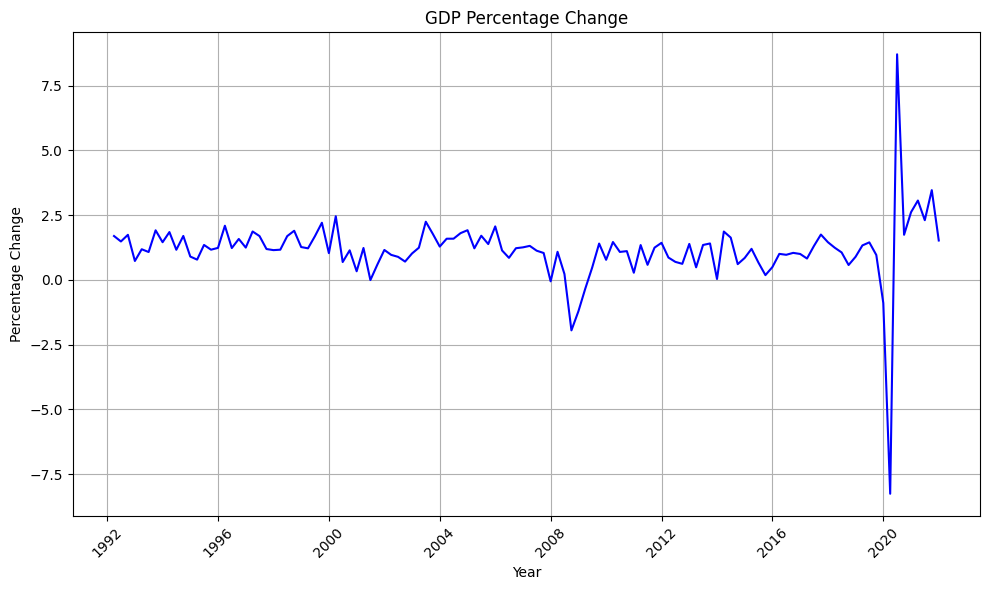

In [6]:
# Plot GDP as percentage change
plt.figure(figsize=(10, 6))
plt.plot(data['GDP'].index, data['GDP'].values, color='blue', linestyle='-')
plt.title('GDP Percentage Change')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Inflation Year-over-Year Percentage Change

This graph shows the year-over-year percentage change in inflation. It indicates the rate at which prices are increasing or decreasing over time.


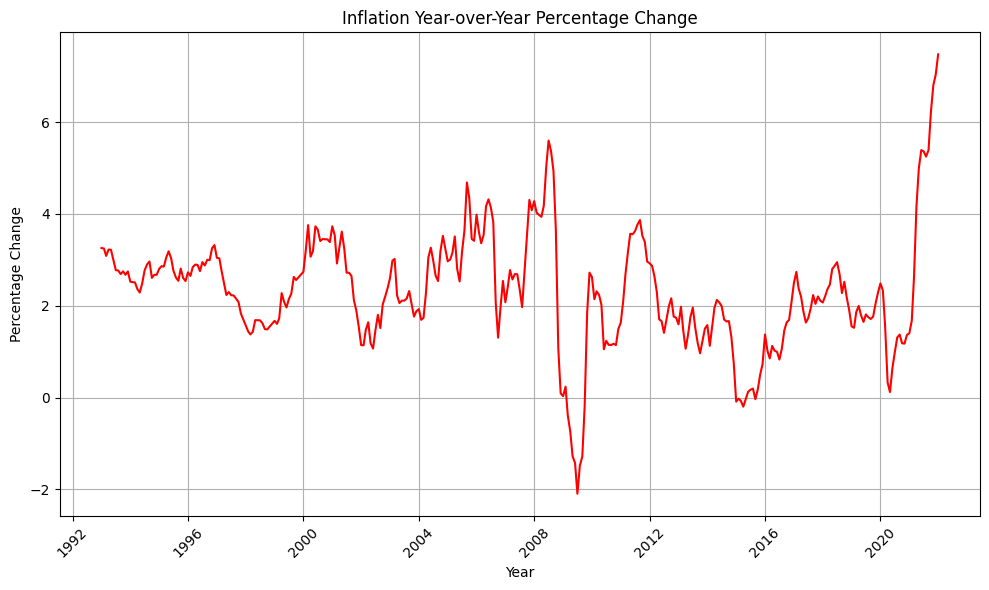

In [7]:
# Plot Inflation as year-over-year percentage change
plt.figure(figsize=(10, 6))
plt.plot(data['Inflation'].index, data['Inflation'].values, color='red', linestyle='-')
plt.title('Inflation Year-over-Year Percentage Change')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Unemployment Rate

This graph illustrates the unemployment rate over time. It indicates the percentage of the labor force that is unemployed.


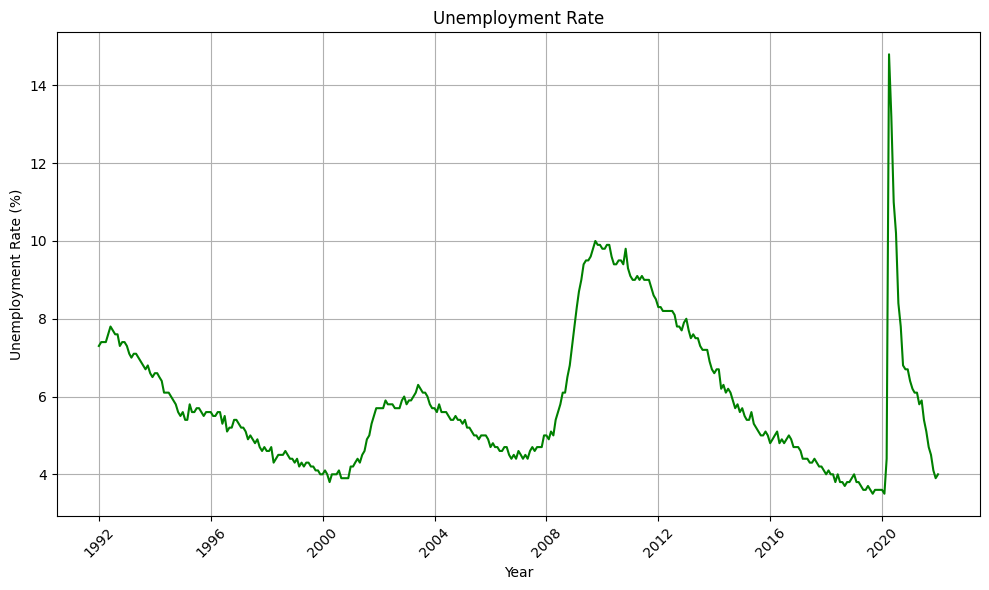

In [8]:
# Plot Unemployment rate
plt.figure(figsize=(10, 6))
plt.plot(data['Unemployment'].index, data['Unemployment'].values, color='green', linestyle='-')
plt.title('Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Federal Funds Rate

This graph displays the Federal Funds Rate over time. It indicates the interest rate at which depository institutions lend reserve balances to other depository institutions overnight.


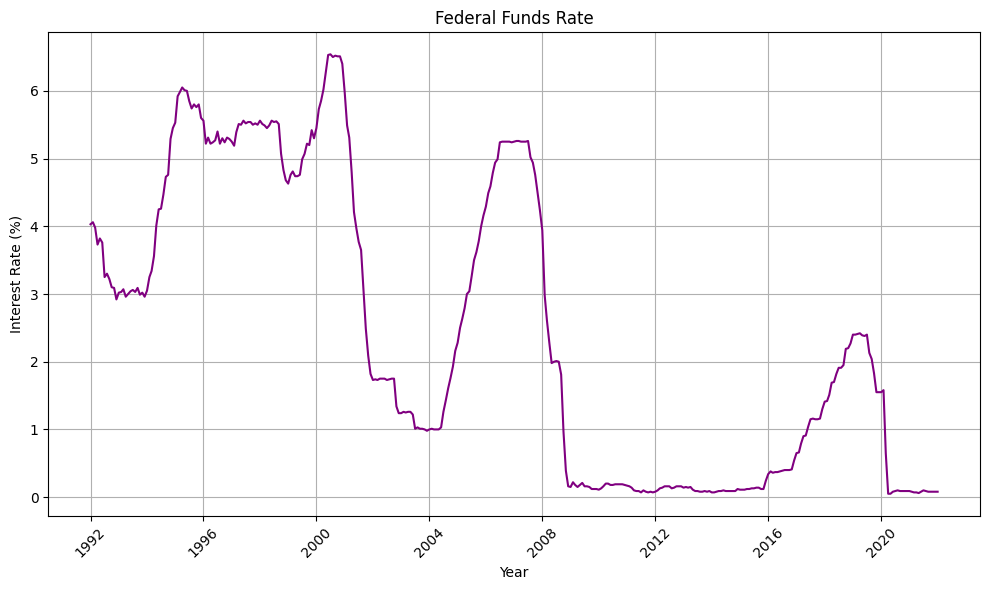

In [10]:
# Plot Interest Rate
plt.figure(figsize=(10, 6))
plt.plot(data['Interest Rate'].index, data['Interest Rate'].values, color='purple', linestyle='-')
plt.title('Federal Funds Rate')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()